In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv("/content/height-weight.csv")

In [7]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'weight')

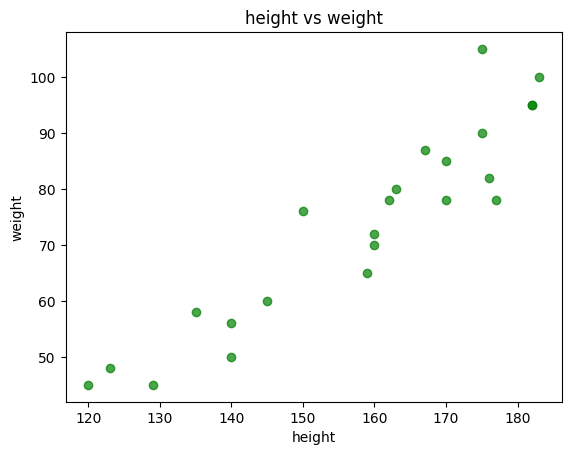

In [8]:
plt.scatter(df['Height'],df['Weight'],color='green',alpha=0.7)
plt.title("height vs weight")
plt.xlabel("height")
plt.ylabel("weight")

In [9]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


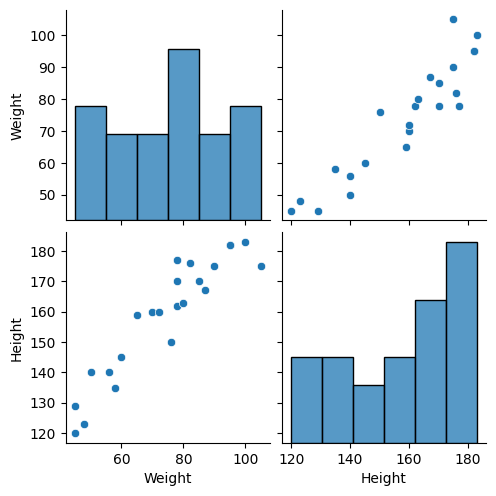

In [10]:
sns.pairplot(df)


In [11]:
X=df[['Weight']]
Y=df['Height']
print(X,"\n",Y,end="",sep='')

    Weight
0       45
1       58
2       48
3       60
4       70
5       78
6       80
7       90
8       95
9       78
10      82
11      95
12     105
13     100
14      85
15      78
16      50
17      65
18      76
19      87
20      45
21      56
22      72
0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [12]:
X_series=df['Weight']
print(X_series)
print()
print(np.array(X_series))
print()
np.array(X_series).shape

0      45
1      58
2      48
3      60
4      70
5      78
6      80
7      90
8      95
9      78
10     82
11     95
12    105
13    100
14     85
15     78
16     50
17     65
18     76
19     87
20     45
21     56
22     72
Name: Weight, dtype: int64

[ 45  58  48  60  70  78  80  90  95  78  82  95 105 100  85  78  50  65
  76  87  45  56  72]



(23,)

In [13]:
np.array(Y).shape

(23,)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [36]:
##StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [38]:
print(X_train)
print()
print(X_test)

[[-0.87662801]
 [ 1.66773133]
 [ 0.33497168]
 [-1.48242785]
 [ 1.36483141]
 [-1.6641678 ]
 [-0.75546804]
 [-0.1496682 ]
 [ 0.21381171]
 [-1.36126788]
 [-0.99778797]
 [-0.02850823]
 [ 1.06193149]
 [ 0.57729161]
 [ 0.75903157]
 [ 0.88019153]
 [ 0.45613165]]

[[ 0.33497168]
 [ 0.33497168]
 [-1.6641678 ]
 [ 1.36483141]
 [-0.45256812]
 [ 1.97063125]]


In [16]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [17]:
print("Coefficient or slope:",regression.coef_)
print('intercepter:',regression.intercept_)

Coefficient or slope: [17.2982057]
intercepter: 156.47058823529412


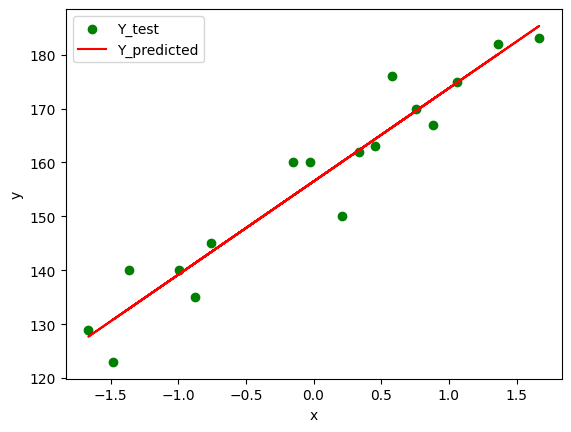

In [59]:
plt.scatter(X_train,Y_train,color='green',label='Y_test')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X_train,regression.predict(X_train),color='red',label='Y_predicted')
plt.legend()

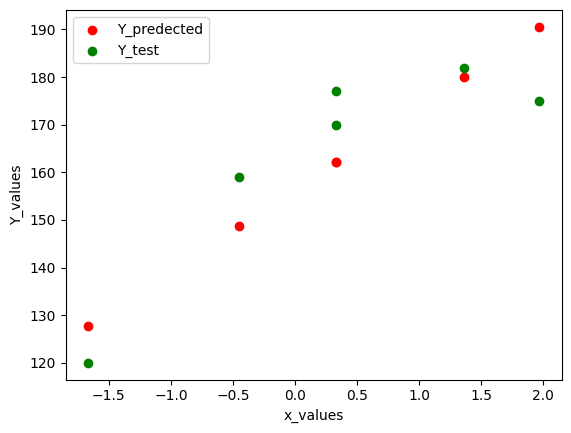

In [54]:
##actual and predicted points
Y_predict=regression.predict(X_test)
plt.scatter(X_test,Y_predict,color='red',label='Y_predected')
plt.scatter(X_test,Y_test,color='green',label='Y_test')
plt.legend()
plt.xlabel('x_values')
plt.ylabel('Y_values')
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae=mean_absolute_error(Y_test,Y_predict)
print(f'mean_absolute_error : {mae}')
mse=mean_squared_error(Y_test,Y_predict)
print(f'mean_squared_error : {mse}')
rmse=mse**(1/2)
print(f'root mean squared error : {rmse}')

mean_absolute_error : 9.66512588679501
mean_squared_error : 114.84069295228699
root mean squared error : 10.716374991212605


In [21]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_predict)
score

0.7360826717981276

In [22]:
adjasted_r2_test=1-(1-score)*(len(Y_test)-1)/(len(Y_test)-(X_test.shape[1])-1)
print(f'adjasted_r2_score: {adjasted_r2_test}')

adjasted_r2_score: 0.6701033397476595


Ordinary Least Squares (OLS)

In [23]:
import statsmodels.api as sm
model=sm.OLS(Y_train,X_train).fit()

In [26]:
predict=model.predict(X_test)
predict

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [27]:
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 21 Dec 2024   Prob (F-statistic):                       0.664
Time:                        15:43:34   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.2982     39.138      0.442      0.664     -65.671     100.267
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.904
Kurtosis:                       2.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
##prediction of new data
print("\n\n\n")
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])